In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
results_path = os.path.join(os.environ['RDKIT_PYROSETTA_PATH'], 'results')
os.chdir(results_path) # change to the directory to results

In [28]:
PYROSETTA_COLOR = '#66c2a5'
RDKIT_COLOR = '#fc8d62'

## Definitions

In [29]:
def make_waterfall_plot(data: pd.Series, color: str) -> plt.figure:
    """Given a pd.Series makes a waterfall plot in order of labels given."""
    diff = data.diff()
    diff.iloc[0] = 0
    heights = diff.apply(lambda x: abs(x)) # heights of bars
    fig, ax = plt.subplots(figsize=(12, 8))
    bars = ax.bar(x=range(len(data)), height=heights.values, bottom=data.values, width=0.5, edgecolor=color, linewidth=2, color=color)
    labels = diff.copy()
    labels.iloc[0] = data.iloc[0]
    labels.iloc[-1] = data.iloc[-1]
    for bar, value in zip(bars, labels.values):
        height = bar.get_height()
        position = bar.get_y() + height
        ax.annotate(f'{int(value)}', xy=(bar.get_x() + bar.get_width() / 2, position),
                    xytext=(0, 5), textcoords="offset points",
                    ha='center', va='bottom')
    ax.set_xticks(ticks=range(len(data)))
    ax.set_xticklabels(data.keys())
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent displaying multiple times in Jupyter notebook
    return fig
def get_waterfall_data(df: pd.DataFrame, dataset: str):
    """Given a pd.DataFrame, compute the cumulative sum that pass each PB check."""
    df = df.iloc[:, 1:] # remove names column
    df_success = df.apply(lambda col: (df.loc[:, :col.name].cumprod(axis=1)[col.name]).sum())
    # Create new Series for all passing
    df_success_all = pd.Series({f'{dataset}_passing_all_tests': df_success.iloc[-1]})
    # Create a new Series for the original length
    original_length_series = pd.Series({f'{dataset}_original_length': len(df)})
    # Concatenate the new Series with the existing Series
    df_success_waterfall = pd.concat([original_length_series, df_success, df_success_all])
    return df_success_waterfall
def check_if_passing_all_checks(df: pd.DataFrame, dataset: str) -> pd.DataFrame:
    """Given a pd.DataFrame, compute if placement has passed all PB check."""
    names = df[f'{dataset}_name']
    df = df.iloc[:, 1:]
    df[f'{dataset}_passing_all_tests'] = df.all(axis=1)
    df = df.insert(0, f'{dataset}_name', names)
    return df

# Analysis

In [30]:
df = pd.read_csv('merged_rmsd_ddg_posebusters.csv', index_col=0)
df

,name,rdkit_name,pyrosetta_name,rdkit_path_mol,pyrosetta_path_mol,rdkit_path_pdb,pyrosetta_path_pdb,ligand_rmsd,rdkit_comRMSD,pyrosetta_comRMSD,...,pyrosetta_sanitization,pyrosetta_all_atoms_connected,pyrosetta_bond_lengths,pyrosetta_bond_angles,pyrosetta_internal_steric_clash,pyrosetta_aromatic_ring_flatness,pyrosetta_double_bond_flatness,pyrosetta_internal_energy,pyrosetta_intra_geom_pass,pyrosetta_intra_geom_energy_pass
0,PJFFRQDHURSHGM-UHFFFAOYSA-N_rdkit-0_pyrosetta-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-0/PJ...,./pyrosetta_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-...,0.713461,0.877480,0.663325,...,True,True,True,True,True,True,True,True,True,True
1,PJFFRQDHURSHGM-UHFFFAOYSA-N_rdkit-0_pyrosetta-1,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-1,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-0/PJ...,./pyrosetta_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-...,0.712547,0.877480,0.663665,...,True,True,True,True,True,True,True,True,True,True
2,PJFFRQDHURSHGM-UHFFFAOYSA-N_rdkit-0_pyrosetta-2,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-2,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-0/PJ...,./pyrosetta_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-...,0.732352,0.877480,0.654336,...,True,True,True,True,True,True,True,True,True,True
3,PJFFRQDHURSHGM-UHFFFAOYSA-N_rdkit-0_pyrosetta-3,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-3,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-0/PJ...,./pyrosetta_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-...,0.613934,0.877480,0.661251,...,True,True,True,True,True,True,True,True,True,True
4,PJFFRQDHURSHGM-UHFFFAOYSA-N_rdkit-0_pyrosetta-4,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,PJFFRQDHURSHGM-UHFFFAOYSA-N-4,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-0/PJ...,./pyrosetta_place/PJFFRQDHURSHGM-UHFFFAOYSA-N-...,0.707882,0.877480,0.663417,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,GCAQUNSOGCAEFO-UHFFFAOYSA-N_rdkit-9_pyrosetta-5,GCAQUNSOGCAEFO-UHFFFAOYSA-N-9,GCAQUNSOGCAEFO-UHFFFAOYSA-N-5,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,0.288576,0.747606,0.693922,...,True,True,True,True,True,True,True,True,True,True
6896,GCAQUNSOGCAEFO-UHFFFAOYSA-N_rdkit-9_pyrosetta-6,GCAQUNSOGCAEFO-UHFFFAOYSA-N-9,GCAQUNSOGCAEFO-UHFFFAOYSA-N-6,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,0.285928,0.747606,0.685882,...,True,True,True,True,True,True,True,True,True,True
6897,GCAQUNSOGCAEFO-UHFFFAOYSA-N_rdkit-9_pyrosetta-7,GCAQUNSOGCAEFO-UHFFFAOYSA-N-9,GCAQUNSOGCAEFO-UHFFFAOYSA-N-7,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,0.283764,0.747606,0.681948,...,True,True,True,True,True,True,True,True,True,True
6898,GCAQUNSOGCAEFO-UHFFFAOYSA-N_rdkit-9_pyrosetta-8,GCAQUNSOGCAEFO-UHFFFAOYSA-N-9,GCAQUNSOGCAEFO-UHFFFAOYSA-N-8,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,./rdkit_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-9/GC...,./pyrosetta_place/GCAQUNSOGCAEFO-UHFFFAOYSA-N-...,0.312672,0.747606,0.699535,...,True

# Distribution of residue RMSDs

Text(0.5, 0, 'Ligand RMSD')

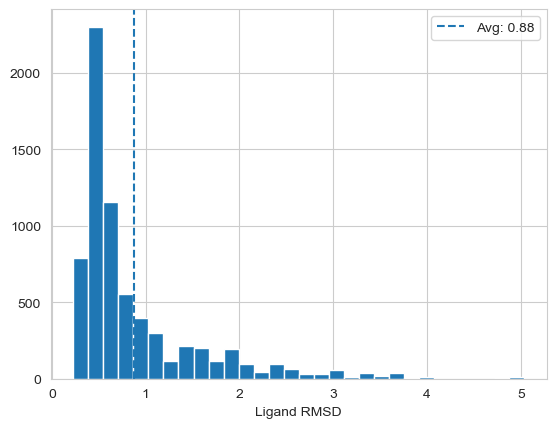

In [31]:
df['ligand_rmsd'].hist(bins=30)
ligand_rmsd_avg = df['ligand_rmsd'].mean()
plt.axvline(ligand_rmsd_avg, linestyle='dashed', label=f'Avg: {ligand_rmsd_avg:.2f}')
plt.legend()
plt.xlabel('Ligand RMSD')

The Ligand RMSD shown is the RMSD between every repeated placed ligand by PyRosetta and RDKit (so 100 RMSD values for 1 ligand since each method placed the ligand 10 times). Overall, an average of 0.88 Å is not significant. But there are a few with high RMSD values >3 Å, after looking at a few examples usually these are ligands that were mapped incorrectly by the `rdMolAlign.CalcRMS(mol1, mol2)`. Good to keep in mind to check mappings from this function if you're using it. 

Text(0.5, 0, 'Residue RMSD')

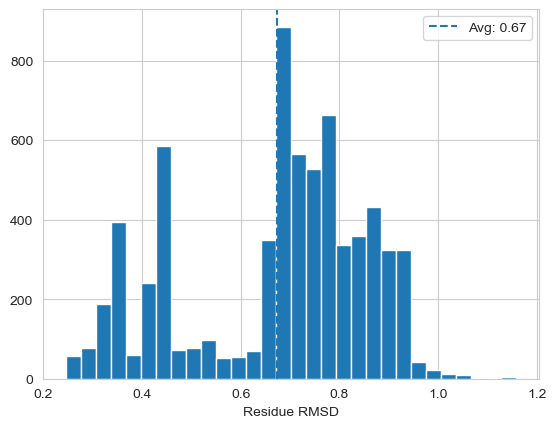

In [32]:
df['residue_rmsd'].hist(bins=30)
residue_rmsd_avg = df['residue_rmsd'].mean()
plt.axvline(residue_rmsd_avg, linestyle='dashed', label=f'Avg: {residue_rmsd_avg:.2f}')
plt.legend()
plt.xlabel('Residue RMSD')

The Residue RMSD is the RMSD between the residues within 8 Å of the centre of mass of the placed ligand. This is interesting to compare as it tells us how much the residues move during the PyRosetta minimisation. With an average of 0.67 Å there is not much movement at all. 

## How does the comRMSD to fragments compare between placement method?

Text(0.5, 0, 'comRMSD')

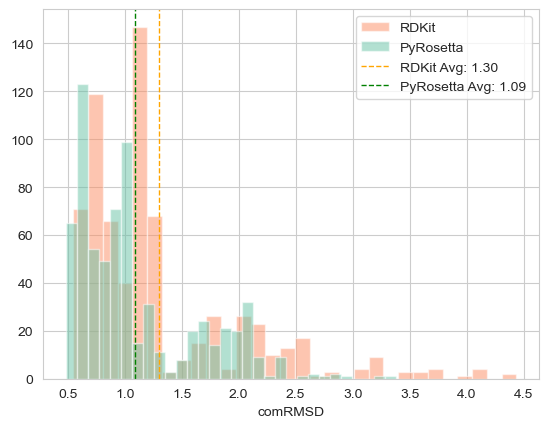

In [33]:
rdkit_df = df[['rdkit_name', 'rdkit_comRMSD']]
rdkit_df = rdkit_df.drop_duplicates(subset=['rdkit_name']) # drop duplicates to get 690
pyrosetta_df = df[['pyrosetta_name', 'pyrosetta_comRMSD']]
pyrosetta_df = pyrosetta_df.drop_duplicates(subset=['pyrosetta_name']) # drop duplicates to get 690
rdkit_df['rdkit_comRMSD'].hist(bins=30, label='RDKit', alpha=0.5, color=RDKIT_COLOR)
pyrosetta_df['pyrosetta_comRMSD'].hist(bins=30, label='PyRosetta', alpha=0.5, color=PYROSETTA_COLOR)
# compute average for each distribution and put as line
rdkit_avg = rdkit_df['rdkit_comRMSD'].mean()
pyrosetta_avg = pyrosetta_df['pyrosetta_comRMSD'].mean()
plt.axvline(rdkit_avg, color='orange', linestyle='dashed', linewidth=1, label=f'RDKit Avg: {rdkit_avg:.2f}')
plt.axvline(pyrosetta_avg, color='green', linestyle='dashed', linewidth=1, label=f'PyRosetta Avg: {pyrosetta_avg:.2f}')
plt.legend()
plt.xlabel('comRMSD')

In [34]:
#TODO: Is the difference in avg comRMSD significant?

comRMSD is the RMSD between the mapped atoms of the fragment and ligand (atoms that map from the fragment to follow-up ligand, directly linking their inspiration). Overall, PyRosetta placement results in a slightly lower comRMSD, therefore meaning these placements are more closely overlapping with the inspiration fragments. 

# How does the ∆∆G compare between placement methods?

Text(0.5, 0, '∆∆G')

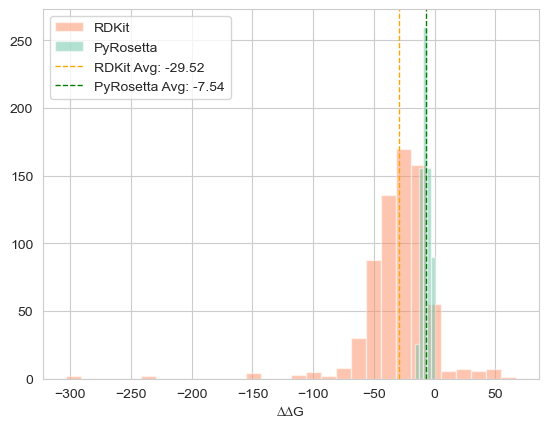

In [35]:
rdkit_df = df[['rdkit_name', 'rdkit_∆∆G', 'rdkit_comRMSD']]
rdkit_df = rdkit_df.drop_duplicates(subset=['rdkit_name']) # drop duplicates to get 690
pyrosetta_df = df[['pyrosetta_name', 'pyrosetta_∆∆G', 'pyrosetta_comRMSD']]
pyrosetta_df = pyrosetta_df.drop_duplicates(subset=['pyrosetta_name']) # drop duplicates to get 690
rdkit_df['rdkit_∆∆G'].hist(bins=30, label='RDKit', alpha=0.5, color=RDKIT_COLOR)
pyrosetta_df['pyrosetta_∆∆G'].hist(bins=5, label='PyRosetta', alpha=0.5, color=PYROSETTA_COLOR)
# compute average for each distribution and put as line
rdkit_avg = rdkit_df['rdkit_∆∆G'].mean()
pyrosetta_avg = pyrosetta_df['pyrosetta_∆∆G'].mean()
plt.axvline(rdkit_avg, color='orange', linestyle='dashed', linewidth=1, label=f'RDKit Avg: {rdkit_avg:.2f}')
plt.axvline(pyrosetta_avg, color='green', linestyle='dashed', linewidth=1, label=f'PyRosetta Avg: {pyrosetta_avg:.2f}')
plt.legend()
plt.xlabel('∆∆G')

In [36]:
rdkit_df['rdkit_∆∆G'].describe()

count    690.000000
mean     -29.521659
std       30.234206
min     -303.842372
25%      -40.963250
50%      -28.125471
75%      -13.745052
max       67.235471
Name: rdkit_∆∆G, dtype: float64

In [37]:
pyrosetta_df['pyrosetta_∆∆G'].describe()

count    688.000000
mean      -7.536710
std        3.447220
min      -16.432368
25%      -10.128208
50%       -7.527063
75%       -4.661423
max       -0.044283
Name: pyrosetta_∆∆G, dtype: float64

Clearly, the values of ∆∆G significantly differ between methods. RDKit values range from -303 to 67 kcal/mol whereas PyRosetta has a much smaller range, -16 to 0 kcal/mol. In my pipeline of using these placements, I use them as a filter for 10K+ ligand designs. I just need to quickly throwaway the compounds that will likely not have a physical conformation within the pocket (positive ∆∆G) and those that will move far away from the fragment pose (comRMSD > 2 Å). 

Therefore, the important question is, will the same compounds be filtered out for both methods here? No. Since there are no positive ∆∆G values output by PyRosetta no compounds will be thrown out. Whereas for RDKit, lets see how many have positive values.

In [38]:
positive_rdkit = rdkit_df[rdkit_df['rdkit_∆∆G'] > 0]
len(positive_rdkit)

38

In [39]:
# are there a few ligands with a high rate of positive ΔΔG values?
positive_rdkit['base_name'] = positive_rdkit['rdkit_name'].apply(lambda x: x.rsplit('-', 1)[0])
positive_rdkit.groupby('base_name')['rdkit_∆∆G'].count()
#positive_rdkit.groupby('base_name')['rdkit_ΔΔG']

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_9507/1160507727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_rdkit['base_name'] = positive_rdkit['rdkit_name'].apply(lambda x: x.rsplit('-', 1)[0])


base_name
AVXQRKTXSXBNPP-UHFFFAOYSA-N    1
CGGHTLUHFDFCAS-UHFFFAOYSA-N    5
CLVVEVVTKNLLLU-UHFFFAOYSA-N    2
CVBLKWHDGHXHMC-UHFFFAOYSA-N    2
LCSKLVVSOFHOOO-UHFFFAOYSA-N    2
NMLCPEMTBQOHIE-UHFFFAOYSA-N    1
PQHLNDLJASDWNV-UHFFFAOYSA-N    4
SRDGULMUCFCNKM-UHFFFAOYSA-N    5
STIQFIHEOJHUKS-UHFFFAOYSA-N    5
WKZRUHMHRSTISJ-UHFFFAOYSA-N    2
XIPUDWAUXVXPNO-UHFFFAOYSA-N    1
XNQQWKFGJZTTEX-UHFFFAOYSA-N    2
YIPNWJATCFTMPP-UHFFFAOYSA-N    1
ZFGIZJRJYCRRHS-UHFFFAOYSA-N    1
ZMNSQVIBTKNQGL-UHFFFAOYSA-N    1
ZTDJEGPURPWKAK-UHFFFAOYSA-N    1
ZVTXJLVFUAMZRS-UHFFFAOYSA-N    2
Name: rdkit_∆∆G, dtype: int64

Out of the 69 ligands, 17 of them had a placement with a positive ΔΔG value. 3 of the ligands had at least 4/10 placements with a positive ΔΔG value. This begs the question of what is the error of the ΔΔG value that we can expect after performing a single placement? These edge cases are important where placements dance the line of positive and negative values as one placement run can produce a negative result whereas another can produce a positive result. Clearly the RDKit minimisation is non-deterministic, therefore we can set a higher threshold of ΔΔG value to filter out ligands by. 

# How does the standard error of the mean of ∆∆G compare between placement methods?

Text(0.5, 0, 'SE of ∆∆G')

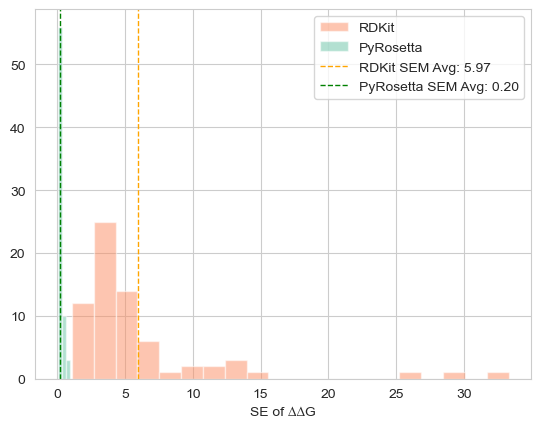

In [40]:
# Plot SE
rdkit_df['base_name'] = rdkit_df['rdkit_name'].apply(lambda x: x.rsplit('-', 1)[0])
sem_rdkit = rdkit_df.groupby('base_name')['rdkit_∆∆G'].sem()
pyrosetta_df['base_name'] = pyrosetta_df['pyrosetta_name'].apply(lambda x: x.rsplit('-', 1)[0])
sem_pyrosetta = pyrosetta_df.groupby('base_name')['pyrosetta_∆∆G'].sem()
avg_sem_rdkit = sem_rdkit.mean()
avg_sem_pyrosetta = sem_pyrosetta.mean()
sem_rdkit.hist(bins=20, label='RDKit', alpha=0.5, color=RDKIT_COLOR)
sem_pyrosetta.hist(bins=3, label='PyRosetta', alpha=0.5, color=PYROSETTA_COLOR)
plt.axvline(avg_sem_rdkit, color='orange', linestyle='dashed', linewidth=1, label=f'RDKit SEM Avg: {avg_sem_rdkit:.2f}')
plt.axvline(avg_sem_pyrosetta, color='green', linestyle='dashed', linewidth=1, label=f'PyRosetta SEM Avg: {avg_sem_pyrosetta:.2f}')
plt.legend()
plt.xlabel('SE of ∆∆G')

Interestingly, the SE of ∆∆G scores by RDKit are over an order of magnitude higher than those computed by PyRosetta. This is important to consider in the future where now I will set the **threshold of the ∆∆G of placements by RDKit to be under 6 kcal/mol**. For PyRosetta, I will not change this threshold. 

## Does one method have a higher standard error of the mean of comRMSD than the other?

Text(0.5, 0, 'SE of comRMSD')

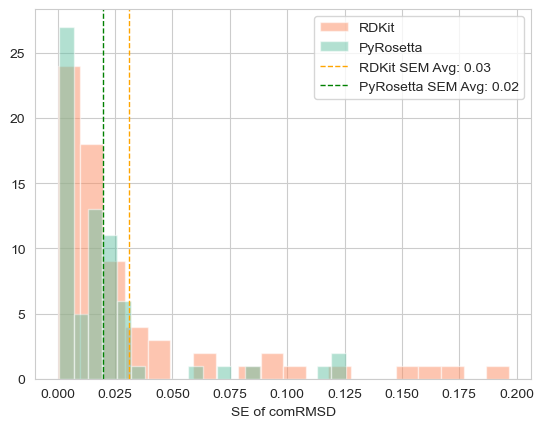

In [41]:
# Plot SE
rdkit_df['base_name'] = rdkit_df['rdkit_name'].apply(lambda x: x.rsplit('-', 1)[0])
sem_rdkit = rdkit_df.groupby('base_name')['rdkit_comRMSD'].sem()
pyrosetta_df['base_name'] = pyrosetta_df['pyrosetta_name'].apply(lambda x: x.rsplit('-', 1)[0])
sem_pyrosetta = pyrosetta_df.groupby('base_name')['pyrosetta_comRMSD'].sem()
avg_sem_rdkit = sem_rdkit.mean()
avg_sem_pyrosetta = sem_pyrosetta.mean()
sem_rdkit.hist(bins=20, label='RDKit', alpha=0.5, color=RDKIT_COLOR)
sem_pyrosetta.hist(bins=20, label='PyRosetta', alpha=0.5, color=PYROSETTA_COLOR)
plt.axvline(avg_sem_rdkit, color='orange', linestyle='dashed', linewidth=1, label=f'RDKit SEM Avg: {avg_sem_rdkit:.2f}')
plt.axvline(avg_sem_pyrosetta, color='green', linestyle='dashed', linewidth=1, label=f'PyRosetta SEM Avg: {avg_sem_pyrosetta:.2f}')
plt.legend()
plt.xlabel('SE of comRMSD')

Both methods have similar low SE values, therefore a new threshold is not required. 

## Comparison of number of placements that pass PoseBuster's checks 

In [42]:
pass_pyrosetta = df[['pyrosetta_name', 'pyrosetta_mol_pred_loaded', 'pyrosetta_sanitization', 'pyrosetta_all_atoms_connected',	'pyrosetta_bond_lengths',	'pyrosetta_bond_angles',	'pyrosetta_internal_steric_clash',	'pyrosetta_double_bond_flatness', 'pyrosetta_internal_energy', 'pyrosetta_aromatic_ring_flatness']]
pass_pyrosetta = pass_pyrosetta.drop_duplicates(subset='pyrosetta_name')
pass_pyrosetta = pass_pyrosetta.fillna(value=False)
# add original number

pass_rdkit = df[['rdkit_name', 'rdkit_mol_pred_loaded',	'rdkit_sanitization',	'rdkit_all_atoms_connected',	'rdkit_bond_lengths',	'rdkit_bond_angles',	'rdkit_double_bond_flatness', 'rdkit_internal_energy', 'rdkit_internal_steric_clash', 'rdkit_aromatic_ring_flatness']]
pass_rdkit = pass_rdkit.drop_duplicates(subset='rdkit_name')
pass_rdkit = pass_rdkit.fillna(value=False)

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_9507/2851542982.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pass_pyrosetta = pass_pyrosetta.fillna(value=False)


In [43]:
#pass_pyrosetta = check_if_passing_all_checks(pass_pyrosetta, dataset='pyrosetta')
pyrosetta_waterfall = get_waterfall_data(df=pass_pyrosetta, dataset='pyrosetta')
# add passing all tests 
pass_pyrosetta

,pyrosetta_name,pyrosetta_mol_pred_loaded,pyrosetta_sanitization,pyrosetta_all_atoms_connected,pyrosetta_bond_lengths,pyrosetta_bond_angles,pyrosetta_internal_steric_clash,pyrosetta_double_bond_flatness,pyrosetta_internal_energy,pyrosetta_aromatic_ring_flatness
0,PJFFRQDHURSHGM-UHFFFAOYSA-N-0,True,True,True,True,True,True,True,True,True
1,PJFFRQDHURSHGM-UHFFFAOYSA-N-1,True,True,True,True,True,True,True,True,True
2,PJFFRQDHURSHGM-UHFFFAOYSA-N-2,True,True,True,True,True,True,True,True,True
3,PJFFRQDHURSHGM-UHFFFAOYSA-N-3,True,True,True,True,True,True,True,True,True
4,PJFFRQDHURSHGM-UHFFFAOYSA-N-4,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...
6805,GCAQUNSOGCAEFO-UHFFFAOYSA-N-5,True,True,True,True,True,True,True,True,True
6806,GCAQUNSOGCAEFO-UHFFFAOYSA-N-6,True,True,True,True,True,True,True,True,True
6807,GCAQUNSOGCAEFO-UHFFFAOYSA-N-7,True,True,True,True,True,True,True,True,True
6808,GCAQUNSOGCAEFO-UHFFFAOYSA-N-8,True,True,True,True,True,True,True,True,True


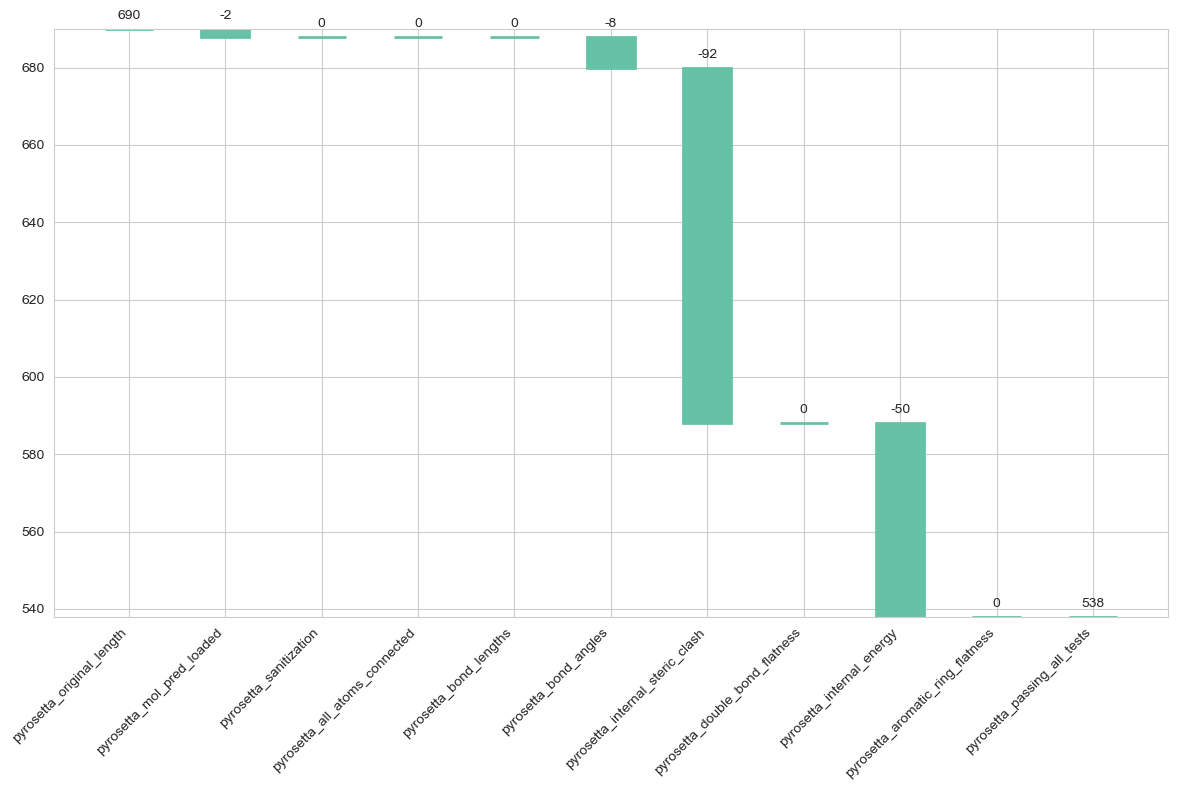

In [44]:
make_waterfall_plot(data=pyrosetta_waterfall, color=PYROSETTA_COLOR)

In [45]:
#pass_rdkit = check_if_passing_all_checks(pass_rdkit, dataset='rdkit')
rdkit_waterfall = get_waterfall_data(df = pass_rdkit, dataset='rdkit')
rdkit_waterfall

rdkit_original_length           690
rdkit_mol_pred_loaded           690
rdkit_sanitization              690
rdkit_all_atoms_connected       690
rdkit_bond_lengths              690
rdkit_bond_angles               690
rdkit_double_bond_flatness      690
rdkit_internal_energy           686
rdkit_internal_steric_clash     675
rdkit_aromatic_ring_flatness    671
rdkit_passing_all_tests         671
dtype: int64

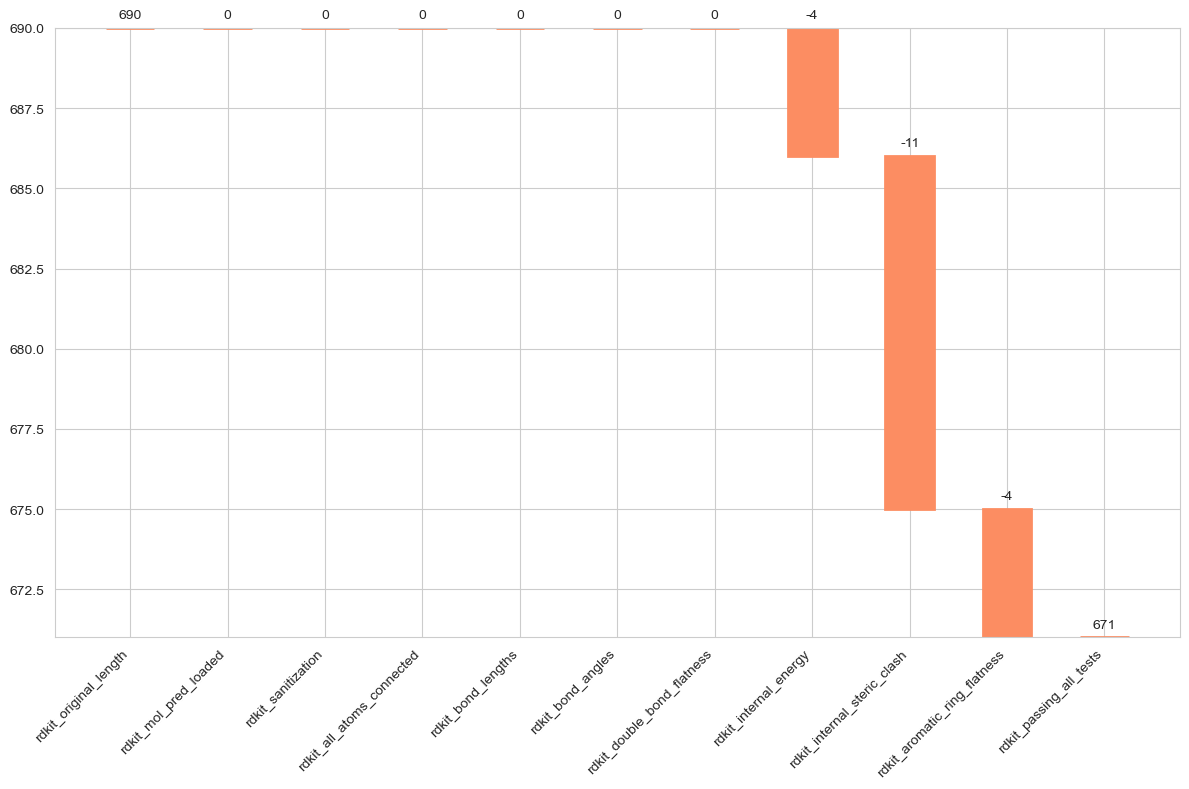

In [46]:
make_waterfall_plot(data=rdkit_waterfall, color=RDKIT_COLOR)

These waterfall plots clearly show that checking the intramolecular geometries of the placements for both methods is important. While it was clearly shown that the [PoseBusters](https://pubs.rsc.org/en/content/articlelanding/2024/sc/d3sc04185a) checks finds many nonphysical conformations output by ML based docking tools, more 'physical' placement methods shown here are not perfect as we have 538 PyRosetta placements and 671 RDKit placements passing all intramolecular checks. **NOTE:** I did not run the intermolecular checks because I'm not worried about clashes with the protein as the constraints to the fragments might result in a false positive clash. 

Firstly, the number of passing placements significantly differs, with 130 more placements passing by RDKit than PyRosetta. This is suprising as PyRosetta had no negative ∆∆G scores. Most of the placements fail on having an internal steric clash for both methods, meaning two non-covalently bonded atoms are above the 0.7 lower bound by `rdkit.Chem.rdDistGeom.GetMoleculeBoundsMatrix` function. Intuitively this seems like a robust method to predict internal steric clash, so it's a little puzzling why so many placements fail this. Similarly for RDKit, the majority fail by the internal steric clash measure, with 11 failing.

The internal energy check fails for more PyRosetta placements than RDKit. This is not a fair comparison as the internal energies calculated for the 50 conformations to compare the input placement against is calculated by the same forcefield that our RDKit placement uses, UFF. Also, the conformations of our placements are more specific as they are restrained to lie closely with the inspiration fragments, an experimental reference. Therefore, I don't think I will be considering this internal energy check. 

Bond angles and aromatic ring flatness are the other checks that either of these methods fail on. Bond angles I will keep using as they are proven by empirical and theory. Aromatic ring flatness I will keep using as it only checks atoms in 5 or 6 membered rings must be within 0.25 Å of the closest shared planem (and not for ring systems with more atoms where the definition of aromaticity and planarity can [get complicated](https://www.dummies.com/article/academics-the-arts/science/chemistry/how-to-determine-the-aromaticity-of-a-ring-system-146353/). 

Overall these PoseBuster checks are interesting and at first glance show a stark difference between the two methods. My takeaways are (1) The internal steric clash threshold might need to be raised, but need to investigate (2) I will not use the internal energy checks for my specific use case and is biased towards showing RDKit placements passing at a higher rate (3) I will keep using bond angles, bond lengths, aromatic ring flatness as these simple geometry checks are easily caught by the eye as a throwaway placement and therefore must be filtered out. 

# How do the outcomes compare with updated thresholds and checks?

In [74]:
df['base_name']= df['name'].apply(lambda x: x.split('_')[0])
rdkit_df = df[['base_name', 'rdkit_name', 'rdkit_comRMSD', 'rdkit_∆∆G', 'rdkit_mol_pred_loaded',	'rdkit_sanitization',	'rdkit_all_atoms_connected',	'rdkit_bond_lengths',	'rdkit_bond_angles', 'rdkit_double_bond_flatness', 'rdkit_internal_energy', 'rdkit_internal_steric_clash', 'rdkit_aromatic_ring_flatness']]
rdkit_df = rdkit_df.drop_duplicates(subset=['rdkit_name'])# drop duplicates to get 690
rdkit_df = rdkit_df.fillna(value=False)
# need to check that all values are non strs
rdkit_df.reset_index(inplace=True, drop=True)
pyrosetta_df = df[['base_name', 'pyrosetta_name', 'pyrosetta_comRMSD', 'pyrosetta_∆∆G', 'pyrosetta_mol_pred_loaded', 'pyrosetta_sanitization', 'pyrosetta_all_atoms_connected',	'pyrosetta_bond_lengths',	'pyrosetta_bond_angles',	'pyrosetta_internal_steric_clash',	'pyrosetta_double_bond_flatness', 'pyrosetta_internal_energy', 'pyrosetta_aromatic_ring_flatness']]
pyrosetta_df = pyrosetta_df.drop_duplicates(subset=['pyrosetta_name']) # drop duplicates to get 690
pyrosetta_df = pyrosetta_df.fillna(value=False)
pyrosetta_df.reset_index(inplace=True, drop=True)
assert len(rdkit_df) == len(pyrosetta_df)

/var/folders/sg/gb03t0zx5sz8vw2lxlghz1gr0000gn/T/ipykernel_9507/3274444197.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pyrosetta_df = pyrosetta_df.fillna(value=False)


In [96]:
# add column 'old_outcome' with True or False on if the placement passes the thresholds:
# RDKit and PyRosetta old_outcome:
#   ΔΔG < 0
#   comRMSD < 2
#   passing all PoseBusters checks
# RDKit new_outcome:
#   ΔΔG < 6
#   comRMSD < 2
#   passing all PoseBuster checks minus internal energy
# PyRosetta new_outcome:
#   ΔΔG < 0
#   comRMSD < 2
#   passing all PoseBuster checks minus internal energy 
def old_outcome(row, method: str):
    if row[f'{method}_∆∆G'] > 0 or row[f'{method}_comRMSD'] > 2:
        return False
    # get last 9 columns of PoseBusters values
    for i in range(4, 13):
        if not row.iloc[i]:
            return False
    return True
def new_outcome(row, method: str):
    if method == 'rdkit':
        if row[f'{method}_∆∆G'] > 6 or row[f'{method}_comRMSD'] > 2:
            return False
    elif method == 'pyrosetta':
        if row[f'{method}_∆∆G'] > 0 or row[f'{method}_comRMSD'] > 2:
            return False
    for i in range(4, 10): # column 10 is internal_energy
        if not row.iloc[i]:
            return False
    for i in range(11, 13):
        if not row.iloc[i]:
            return False
    return True
rdkit_df['old_outcome'] = rdkit_df.apply(lambda x: old_outcome(x, 'rdkit'), axis=1)
pyrosetta_df['old_outcome'] = pyrosetta_df.apply(lambda x: old_outcome(x, 'pyrosetta'), axis=1)
rdkit_df['new_outcome'] = rdkit_df.apply(lambda x: new_outcome(x, 'rdkit'), axis=1)
pyrosetta_df['new_outcome'] = pyrosetta_df.apply(lambda x: new_outcome(x, 'pyrosetta'), axis=1)

In [ ]:
rdkit_old = rdkit_df.groupby('base_name')['old_outcome'].sum()
rdkit_new = rdkit_df.groupby('base_name')['new_outcome'].sum()

In [103]:
pyrosetta_df.groupby('base_name')['old_outcome'].sum()

base_name
AKCZIULVMOLGHC-UHFFFAOYSA-N     5
AKSURHUAGQQWHX-UHFFFAOYSA-N    10
ALCJNIPCFITZHL-UHFFFAOYSA-N     0
APPQVEGAZDMLRK-UHFFFAOYSA-N    10
AVXQRKTXSXBNPP-UHFFFAOYSA-N    10
                               ..
ZEEZCEGNYUPWRG-UHFFFAOYSA-N     1
ZFGIZJRJYCRRHS-UHFFFAOYSA-N    10
ZMNSQVIBTKNQGL-UHFFFAOYSA-N     0
ZTDJEGPURPWKAK-UHFFFAOYSA-N     9
ZVTXJLVFUAMZRS-UHFFFAOYSA-N     4
Name: old_outcome, Length: 69, dtype: int64

In [109]:
pyrosetta_df.groupby('base_name')['new_outcome'].sum()

base_name
AKCZIULVMOLGHC-UHFFFAOYSA-N     5
AKSURHUAGQQWHX-UHFFFAOYSA-N    10
ALCJNIPCFITZHL-UHFFFAOYSA-N     0
APPQVEGAZDMLRK-UHFFFAOYSA-N    10
AVXQRKTXSXBNPP-UHFFFAOYSA-N    10
                               ..
ZEEZCEGNYUPWRG-UHFFFAOYSA-N     1
ZFGIZJRJYCRRHS-UHFFFAOYSA-N    10
ZMNSQVIBTKNQGL-UHFFFAOYSA-N     0
ZTDJEGPURPWKAK-UHFFFAOYSA-N     9
ZVTXJLVFUAMZRS-UHFFFAOYSA-N     4
Name: new_outcome, Length: 69, dtype: int64

# Takeaways
- The RMSD of ligand and residue coordinates are not that different (< 1 Å on avg).
- The SEM of ΔΔG scores is ~6 kcal/mol for RDKit and 0.2 kcal/mol for PyRosetta, therefore I'm changing the threshold of RDKit placements to be under 6 kcal/mol to be considered a pass (instead of 0 kcal/mol).
- The SEM of comRMSD values is <0.05 Å, very small, therefore no change in threshold is required.
- The use of UFF with RDKit to perform PoseBuster's internal energy checks positively biases the number of placements by RDKit passing vs PyRosetta. 
- The high number of placements with an internal steric clash with PyRosetta is high, still need to look into why this is the case. Could warrant a raise in the lower bound threshold value to 0.6 instead of 0.7.
- The bond angle, bond length, aromatic ring flatness are all well known range of values per known geometries, they are easily caught by a trained eye and will usually be questioned with "how did this pass?". Therefore, these checks will be used. 